# **Project Name** : Pneumonia Classification Using VGG-16 + SVM

#### **Project Type** - Classification
#### **Contribution** - Individual
#### **Name** - Ahmad Bintang Arif

## Import Library

In [30]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch

## Data preparation

In [31]:
path = 'D:/Kuliah/Semester 7/Data Mining Terapan/Tugas akhir/Dataset'
train_path = os.path.join(path, 'train')
train_normal_path = os.path.join(train_path, 'NORMAL')
train_covid_path = os.path.join(train_path, 'COVID')
train_bacterial_path = os.path.join(train_path, 'BACTERIAL')
train_viral_path = os.path.join(train_path, 'VIRAL')

val_path = os.path.join(path, 'val')
test_path = os.path.join(path, 'test')

In [32]:
def load_data(data_dir):
    data = []
    labels = []
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.resize(image, (224, 224))  # Change image size into 224x224
                data.append(image)
                labels.append(folder)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

train_data, train_labels = load_data(os.path.join(path, 'train'))
val_data, val_labels = load_data(os.path.join(path, 'val'))
test_data, test_labels = load_data(os.path.join(path, 'test'))


In [33]:
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

In [5]:
train_data_flat = train_data.reshape(train_data.shape[0], -1)
val_data_flat = val_data.reshape(val_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

In [39]:
print(train_data_flat.shape)
print(val_data_flat.shape)
print(test_data_flat.shape)

(4512, 150528)
(966, 150528)
(964, 150528)


# Classification Baseline (Without Feature Extraction VGG16)

In [9]:
svm = SVC()
svm.fit(train_data_flat, train_labels_enc)

SVC()

## Evaluation model

## Evaluation on data validation

In [10]:
# Evaluate the model using the validation data 
val_pred = svm.predict(val_data_flat) 

In [12]:
# Print accuracy and classification report
print("Validation Accuracy:", accuracy_score(val_labels_enc, val_pred))
print(classification_report(val_labels_enc, val_pred, target_names=['NORMAL', 'COVID','BACTERIAL','VIRAL']))

Validation Accuracy: 0.7867494824016563
              precision    recall  f1-score   support

      NORMAL       0.73      0.94      0.82       417
       COVID       0.90      0.91      0.90        87
   BACTERIAL       0.87      0.96      0.91       238
       VIRAL       0.79      0.27      0.41       224

    accuracy                           0.79       966
   macro avg       0.82      0.77      0.76       966
weighted avg       0.79      0.79      0.75       966



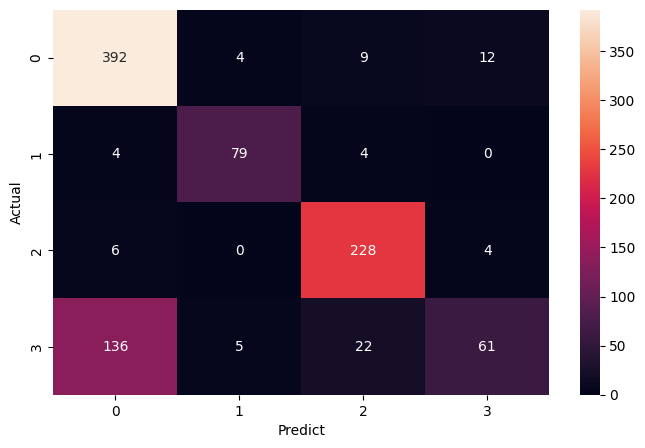

In [13]:
# Print confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(val_labels_enc, val_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

## Evaluation on data test

In [14]:
# Evaluate the model using the test data 
test_pred = svm.predict(test_data_flat)

In [16]:
# Print accuracy and classification report
print("Testing Accuracy:", accuracy_score(test_labels_enc, test_pred))
print(classification_report(test_labels_enc, test_pred, target_names=['NORMAL', 'COVID','BACTERIAL','VIRAL']))

Testing Accuracy: 0.8371369294605809
              precision    recall  f1-score   support

      NORMAL       0.79      0.94      0.86       417
       COVID       0.94      0.91      0.92        86
   BACTERIAL       0.90      0.95      0.92       237
       VIRAL       0.85      0.50      0.63       224

    accuracy                           0.84       964
   macro avg       0.87      0.82      0.83       964
weighted avg       0.84      0.84      0.83       964



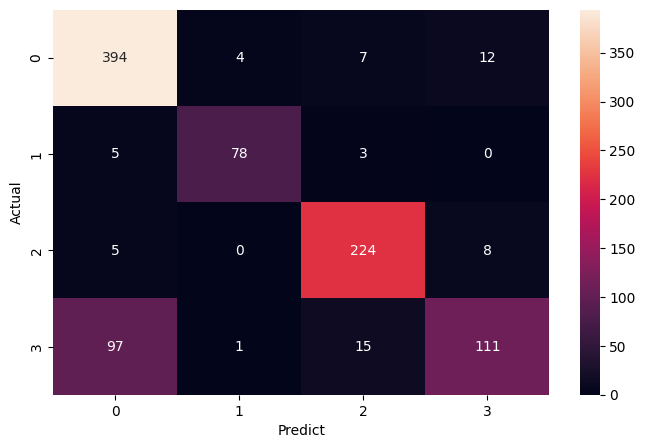

In [17]:
# Print confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_labels_enc, test_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

# Using Feature Extraction VGG16

## Build Pretrained Model VGG16

In [18]:
# Import pretrained model VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Feature Extraction of Image with VGG16

In [21]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_features(data, model):
    data_preprocessed = preprocess_input(data)
    features = model.predict(data_preprocessed)
    features_flat = features.reshape(features.shape[0], -1)
    return features_flat

train_features = extract_features(train_data, vgg)
val_features = extract_features(val_data, vgg)
test_features = extract_features(test_data, vgg)

31/31 [==============================] - 162s 5s/step


## Prediction of feature extraction results with SVM

In [22]:
svm2 = SVC()
svm2.fit(train_features, train_labels_enc)

SVC()

## Evaluation on data validation

In [23]:
# Evaluate the model using the val data 
val_pred2 = svm2.predict(val_features)

In [24]:
# Print accuracy and classification report
print("Validation Accuracy:", accuracy_score(val_labels_enc, val_pred2))
print(classification_report(val_labels_enc, val_pred2))

Validation Accuracy: 0.8240165631469979
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       417
           1       0.99      0.97      0.98        87
           2       0.91      0.99      0.95       238
           3       0.96      0.32      0.48       224

    accuracy                           0.82       966
   macro avg       0.90      0.81      0.81       966
weighted avg       0.85      0.82      0.80       966



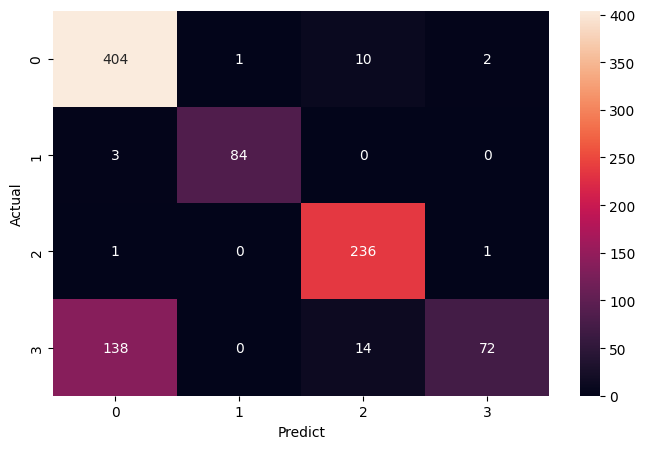

In [25]:
# Print confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(val_labels_enc, val_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

## Evaluation on data test

In [26]:
# Evaluate the model using the test data 
test_pred2 = svm2.predict(test_features)

In [27]:
# Print accuracy and classification report
print("Testing Accuracy:", accuracy_score(test_labels_enc, test_pred2))
print(classification_report(test_labels_enc, test_pred2))

Testing Accuracy: 0.8682572614107884
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       417
           1       0.98      0.98      0.98        86
           2       0.93      0.99      0.96       237
           3       0.97      0.50      0.65       224

    accuracy                           0.87       964
   macro avg       0.92      0.86      0.87       964
weighted avg       0.89      0.87      0.86       964



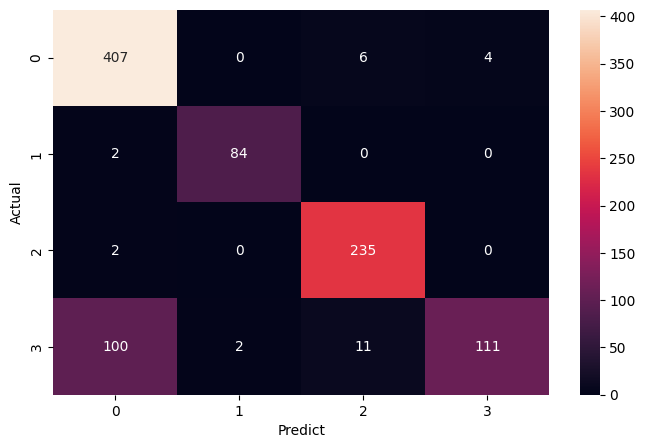

In [28]:
# Print confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_labels_enc, test_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()